# Car Price Prediction

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df=pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Price.csv')

In [4]:
df.head

<bound method NDFrame.head of         Brand                                Model  Year  Selling_Price  \
0      Maruti                        Maruti 800 AC  2007          60000   
1      Maruti             Maruti Wagon R LXI Minor  2007         135000   
2     Hyundai                 Hyundai Verna 1.6 SX  2012         600000   
3      Datsun               Datsun RediGO T Option  2017         250000   
4       Honda                Honda Amaze VX i-DTEC  2014         450000   
...       ...                                  ...   ...            ...   
4335  Hyundai  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999   
4336  Hyundai           Hyundai i20 Magna 1.4 CRDi  2014         409999   
4337   Maruti                  Maruti 800 AC BSIII  2009         110000   
4338  Hyundai     Hyundai Creta 1.6 CRDi SX Option  2016         865000   
4339  Renault                     Renault KWID RXT  2016         225000   

      KM_Driven    Fuel Seller_Type Transmission         Owner  
0   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
df[['Brand']].value_counts()

Brand        
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
Name: count, dtype: int64

In [8]:
df[['Model']].value_counts()

Model                               
Maruti Swift Dzire VDI                  69
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         47
Hyundai EON Era Plus                    35
Maruti Alto LX                          35
                                        ..
Mahindra KUV 100 G80 K4 Plus             1
Mahindra KUV 100 mFALCON D75 K8          1
Mahindra KUV 100 mFALCON D75 K8 AW       1
Mahindra KUV 100 mFALCON G80 K2 Plus     1
Volvo XC60 D5 Inscription                1
Name: count, Length: 1491, dtype: int64

In [9]:
df[['Fuel']].value_counts()

Fuel    
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [10]:
df[['Seller_Type']].value_counts()

Seller_Type     
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [11]:
df[['Transmission']].value_counts()

Transmission
Manual          3892
Automatic        448
Name: count, dtype: int64

In [12]:
df[['Owner']].value_counts()

Owner               
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [13]:
df.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
df.shape

(4340, 9)

In [15]:
df.replace({'Fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

In [16]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

In [17]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [18]:
df.replace({'Owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [19]:
y=df['Selling_Price']

In [20]:
y.shape

(4340,)

In [21]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Selling_Price, Length: 4340, dtype: int64

In [47]:
x=df[['Year','KM_Driven','Fuel','Seller_Type','Transmission','Owner']]

In [23]:
x.shape

(4340, 6)

In [24]:
x

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1
...,...,...,...,...,...,...
4335,2014,80000,1,0,0,1
4336,2014,80000,1,0,0,1
4337,2009,83000,0,0,0,1
4338,2016,90000,1,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=222529)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3038, 6), (1302, 6), (3038,), (1302,))

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr=LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred=lr.predict(x_test)

In [32]:
y_pred.shape

(1302,)

In [33]:
y_pred

array([401110.15351233, 617658.74774636, 536466.81883577, ...,
       425240.41060647, 631846.59426305, 472136.35070331])

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [35]:
mean_squared_error(y_test,y_pred)

211916283349.51367

In [36]:
mean_absolute_error(y_test,y_pred)

235659.72181216738

In [37]:
r2_score(y_test,y_pred)

0.4201559878572707

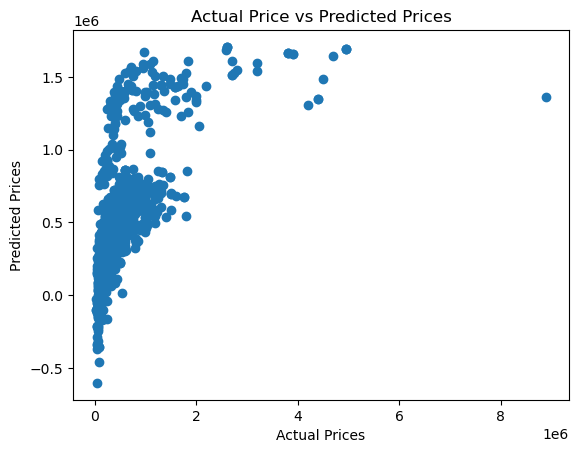

In [38]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [39]:
df_new=df.sample(1)

In [40]:
df_new

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
2128,Honda,Honda Civic 1.8 S MT,2006,220000,120000,0,0,0,2


In [41]:
df_new.shape

(1, 9)

In [42]:
x_new=df_new.drop(['Brand','Model','Selling_Price'],axis=1)

In [43]:
y_pred_new=lr.predict(x_new)

In [44]:
y_pred_new=lr.predict(x_new)

In [49]:
y_pred_new

array([-57272.8864426])